# **Tarea Final**

Antes de iniciar:


In [ ]:
!pip install fiona


In [ ]:
belgicaMap="https://github.com/betsfv/introgeodf/raw/refs/heads/main/maps/belgicaMaps_3447.gpkg"
linkWorldMap="https://github.com/betsfv/introgeodf/raw/refs/heads/main/maps/WorldMaps.gpkg"
import geopandas as gpd
from  fiona import listlayers

In [ ]:
listlayers(belgicaMap)

['paises', 'ciudades', 'rios', 'aeropuertos', 'estados', 'municipalidades']

In [ ]:
#Para los datos del WorldMap
paisesMundo=gpd.read_file(linkWorldMap,layer='paises') #Read from the local file
riosMundo=gpd.read_file(linkWorldMap,layer='rios') #Read from the local file
ciudadesMundo=gpd.read_file(linkWorldMap,layer='ciudades') #Read from the local file
indicadoresMundo=gpd.read_file(linkWorldMap,layer='indicators') #Read from the local file
#Para los datos de Belgica
riosBelgica=gpd.read_file(belgicaMap,layer='rios')
ciudadesBelgica=gpd.read_file(belgicaMap,layer='ciudades')
airportsBelgica=gpd.read_file(belgicaMap,layer='aeropuertos')
paisBelgica=gpd.read_file(belgicaMap,layer='paises')
bel_estados=gpd.read_file(belgicaMap,layer='estados')
bel_municipalidades=gpd.read_file(belgicaMap,layer='municipalidades')

### Ejercicio 1

<div class="alert-success">
    
1. Utilice dos mapas de puntos de su país.

2. Calcule la matriz de distancias para ambos mapas.

3. Seleccione una fila de la matriz de distancias y trace los dos puntos con la distancia mínima encima del país de su elección.
</div>

In [ ]:
import pandas as pd

LinkPuertos="https://github.com/CienciaDeDatosEspacial/GeoDataFrame_Analytics/raw/main/data/UpdatedPub150.csv"
infoseaports=pd.read_csv(LinkPuertos)

infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [ ]:
#renombrar
infoseaports.rename(columns={'Main Port Name':'Nombre Puerto'},inplace=True)
#dejamos columnas esenciales
infoseaports=infoseaports.loc[:,['Nombre Puerto', 'Country Code','Latitude', 'Longitude']]

infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nombre Puerto  3739 non-null   object 
 1   Country Code   3739 non-null   object 
 2   Latitude       3739 non-null   float64
 3   Longitude      3739 non-null   float64
dtypes: float64(2), object(2)
memory usage: 117.0+ KB


In [ ]:
infoseaports.head()

,Nombre Puerto,Country Code,Latitude,Longitude
0,Maurer,United States,40.533333,-74.250000
1,Mangkasa Oil Terminal,Indonesia,-2.733333,121.066667
2,Iharana,Madagascar,-13.350000,50.000000
3,Andoany,Madagascar,-13.400000,48.300000
4,Chake Chake,Tanzania,-5.250000,39.766667


In [ ]:
#spatial points (unprojected)
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude),
                          crs=4326)# notice it is unprojected #siempre que sea long lat 4326 y luego lo reproyectas

# mantenemos bélgica
puertomar_bel=seaports[seaports['Country Code']=='Belgium'].copy()

# reset indexes
puertomar_bel.reset_index(drop=True, inplace=True)

# reprojecting
puertomar_bel_3447=puertomar_bel.to_crs(3447) # projected crs

<Axes: >

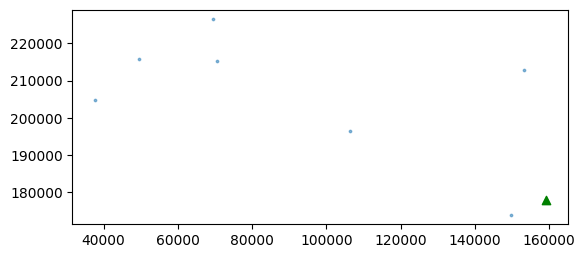

In [ ]:
# subsetting
AeropuertosLargos=airportsBelgica[airportsBelgica['kind']=='large_airport']
AeropuertosLargos.reset_index(drop=True, inplace=True)

#plotting
base=AeropuertosLargos.plot(color='green',marker="^")
puertomar_bel_3447.plot(ax=base,alpha=0.5,markersize=3)

In [ ]:
puertomar_bel_3447.head()

,Nombre Puerto,Country Code,Latitude,Longitude,geometry
0,Oostende,Belgium,51.233333,2.916667,POINT (49578.072 215690.261)
1,Nieuwpoort,Belgium,51.133333,2.750000,POINT (37698.418 204806.863)
2,Zeebrugge,Belgium,51.333333,3.200000,POINT (69538.386 226467.868)
3,Bruges,Belgium,51.233333,3.216667,POINT (70528.683 215325.523)
4,Ghent,Belgium,51.066667,3.733333,POINT (106456.815 196354.727)


In [ ]:
AeropuertosLargos.head()

,name,kind,latitude_deg,longitude_deg,elevation_ft,municipality,geometry
0,Brussels Airport,large_airport,50.901402,4.48444,175.0,Zaventem,POINT (159136.679 177792.441)


In [ ]:
# distancia entre Brussels Airport y Oostende
AeropuertosLargos.iloc[0].geometry.distance(puertomar_bel_3447.iloc[0].geometry)/1000  # in km #se usa con las geometrías

115.92813727643458

In [ ]:
#Hagamos matriz de doble ingreso

puertomar_bel_3447.set_index('Nombre Puerto').geometry.apply(\
lambda g: AeropuertosLargos.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

name,Brussels Airport
Nombre Puerto,
Antwerpen,35.568473
Bruges,96.229461
Bruxelles,10.219115
Ghent,55.854512
Nieuwpoort,124.406713
Oostende,115.928137
Zeebrugge,101.966422


In [ ]:
matriz_distancias= puertomar_bel_3447.set_index('Nombre Puerto').geometry.apply\
                          (lambda g: AeropuertosLargos.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

In [ ]:
#Opcionalmente, podemos hacer algunas operaciones, pero como solo hay un large airport, salen igual sea promedio min o max
# El promedio de seaport to all the large airports (sorted) #OJO: como solo hay uno, la distancia promedio es la real
matriz_distancias.mean(axis=1).sort_values(ascending=True) #axis=0?

,0
Nombre Puerto,
Bruxelles,10.219115
Antwerpen,35.568473
Ghent,55.854512
Bruges,96.229461
Zeebrugge,101.966422
Oostende,115.928137
Nieuwpoort,124.406713


In [ ]:
SomeStats=pd.DataFrame()
SomeStats['mean']=matriz_distancias.mean(axis=1)
SomeStats['min']=matriz_distancias.min(axis=1)
SomeStats['max']=matriz_distancias.max(axis=1)

# see some
SomeStats.head()

,mean,min,max
Nombre Puerto,,,
Antwerpen,35.568473,35.568473,35.568473
Bruges,96.229461,96.229461,96.229461
Bruxelles,10.219115,10.219115,10.219115
Ghent,55.854512,55.854512,55.854512
Nieuwpoort,124.406713,124.406713,124.406713


In [ ]:
# farthest airport to each seaport
matriz_distancias.idxmax(axis=1)

,0
Nombre Puerto,
Antwerpen,Brussels Airport
Bruges,Brussels Airport
Bruxelles,Brussels Airport
Ghent,Brussels Airport
Nieuwpoort,Brussels Airport
Oostende,Brussels Airport
Zeebrugge,Brussels Airport


In [ ]:
# farthest seaport to each airport
matriz_distancias.idxmax(axis=0)

,0
name,
Brussels Airport,Nieuwpoort


In [ ]:
# closest airport to each seaport
matriz_distancias.idxmin(axis=1)

,0
Nombre Puerto,
Antwerpen,Brussels Airport
Bruges,Brussels Airport
Bruxelles,Brussels Airport
Ghent,Brussels Airport
Nieuwpoort,Brussels Airport
Oostende,Brussels Airport
Zeebrugge,Brussels Airport


In [ ]:
# closest seaport to each airport
matriz_distancias.idxmin(axis=0)

,0
name,
Brussels Airport,Bruxelles


<Axes: >

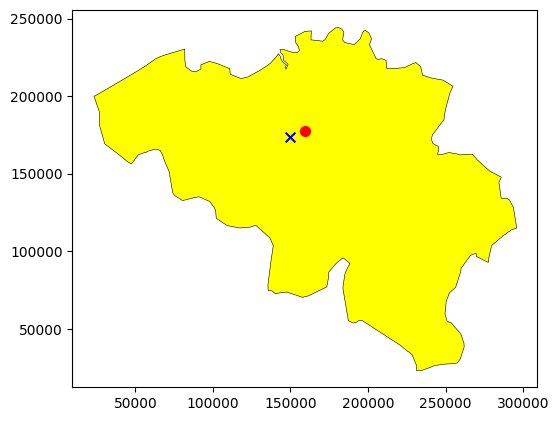

In [ ]:
#Ahora, ploteamos dos puntos con la mínima distancia (Brussels Airport y Bruxelles ) en el mapa de Bélgica
base=paisBelgica.plot(facecolor="yellow", edgecolor="black",linewidth=0.4,figsize=(6,6))
brussels_airport = AeropuertosLargos[AeropuertosLargos['name'] == 'Brussels Airport']
bruxelles_seaport = puertomar_bel_3447[puertomar_bel_3447['Nombre Puerto'] == 'Bruxelles']
brussels_airport.plot(ax=base, color='red', marker='o', markersize=50, label='Brussels Airport')
bruxelles_seaport.plot(ax=base, color='blue', marker='x', markersize=50, label='Bruxelles Seaport')

### Ejercicio 2

<div class="alert-success">
    
1. Utilice un mapa de puntos y un mapa de líneas de su país.

2. Calcule la matriz de distancias para ambos.

3. Seleccione una línea de la matriz de distancias y trace los puntos más cercanos y más lejanos a esa línea.
    
    
</div>

In [ ]:
riosBelgica.head()

,OBJECTID,NAME,Shape_Leng,Shape__Len,geometry
0,83,Meuse,731178.150277,1.142061e+06,"MULTILINESTRING ((253383.152 204548.535, 25328..."
1,128,Sambre,137058.006260,2.144232e+05,"MULTILINESTRING ((133105.061 112023.085, 13418..."
2,132,Scheldt,268051.355184,4.231278e+05,"MULTILINESTRING ((84352.829 134199.904, 84158...."


In [ ]:
#elegimos uno
riosBelgica[riosBelgica.NAME.str.contains('Meuse')]

,OBJECTID,NAME,Shape_Leng,Shape__Len,geometry
0,83,Meuse,731178.150277,1.142061e+06,"MULTILINESTRING ((253383.152 204548.535, 25328..."


In [ ]:
# distancia de cada airport a Meuse
riosBelgica[riosBelgica.NAME.str.contains('Meuse')].iloc[0].geometry.distance(AeropuertosLargos.set_index('name').geometry)/1000

,geometry
name,
Brussels Airport,55.497294


In [ ]:
matriz_rio=riosBelgica.set_index('NAME').geometry.apply\
(lambda g: AeropuertosLargos.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
matriz_rio

name,Brussels Airport
NAME,
Meuse,55.497294
Sambre,50.162034
Scheldt,25.860296


In [ ]:
!pip install mapclassify
base=AeropuertosLargos.explore(color='red',marker_kwds=dict(radius=10))
riosBelgica[riosBelgica.NAME.str.contains('Meuse')].explore(m=base)

In [ ]:
#notar que los 3 ríos son multilinestring
mins=matriz_rio.idxmin(axis="columns") # same as axis=1
mins

,0
NAME,
Meuse,Brussels Airport
Sambre,Brussels Airport
Scheldt,Brussels Airport


In [ ]:
# one of them
mins.iloc[1]

'Brussels Airport'

In [ ]:
!pip install mapclassify
base=riosBelgica.explore()
# the closest
AeropuertosLargos[AeropuertosLargos.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
# NOT the closest
AeropuertosLargos[~AeropuertosLargos.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

<ipython-input-102-8a5872aa3ae0>:6: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  AeropuertosLargos[~AeropuertosLargos.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))


### Ejercicio 3

<div class="alert-success">
    
1. Create a HULL for some set of line map.

2. Compute the distance matrix between the HULLS and a map of points.

3. Plot the HULLS and the points. Show the closest and farthest points to the HULL.
    
</div>    

In [ ]:
# polygon para cada sistema (río)
riosBelgica.convex_hull

,0
0,"POLYGON ((183948.173 95958.453, 183790.491 968..."
1,"POLYGON ((133105.061 112023.085, 135783.113 11..."
2,"POLYGON ((84352.829 134199.904, 84158.796 1343..."


<Axes: >

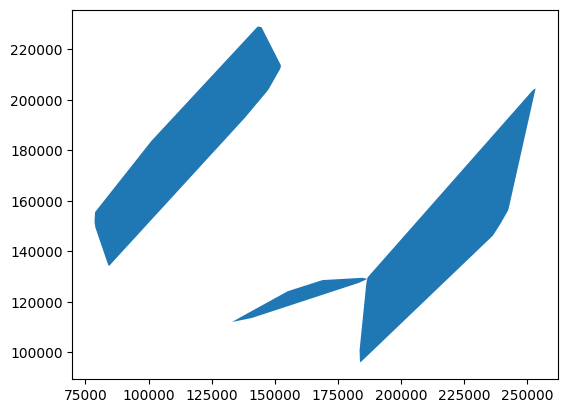

In [ ]:
# see them
riosBelgica.convex_hull.plot()

In [ ]:
rios_hulls=riosBelgica.convex_hull.to_frame()
rios_hulls['sistema']=['Meuse', 'Sambre', 'Scheldt']
rios_hulls.rename(columns={0:'geometría'},inplace=True)
rios_hulls=rios_hulls.set_geometry('geometría')
rios_hulls.crs="EPSG:3447"
rios_hulls

,geometría,sistema
0,"POLYGON ((183948.173 95958.453, 183790.491 968...",Meuse
1,"POLYGON ((133105.061 112023.085, 135783.113 11...",Sambre
2,"POLYGON ((84352.829 134199.904, 84158.796 1343...",Scheldt


In [ ]:
matriz_hulls=rios_hulls.set_index('sistema').geometry.apply\
(lambda g: AeropuertosLargos.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

matriz_hulls

name,Brussels Airport
sistema,
Meuse,52.583268
Sambre,50.162034
Scheldt,25.785806


In [ ]:
mins=matriz_hulls.idxmin(axis="columns")
mins

,0
sistema,
Meuse,Brussels Airport
Sambre,Brussels Airport
Scheldt,Brussels Airport


In [ ]:
#ploteamos
base=rios_hulls.explore()
AeropuertosLargos[AeropuertosLargos.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
AeropuertosLargos[~AeropuertosLargos.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

<ipython-input-108-bb11343fec23>:4: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  AeropuertosLargos[~AeropuertosLargos.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))


### Ejercicio 4

<div class="alert-success">
    
1. Select a line map and a point one.

2. Get the buffer for the lines, select a distance.

3. Keep the points that are within the buffer (you might need to play with differn distances until you show something interesting.  
    
</div>   

In [ ]:
# remember:
matriz_rio

name,Brussels Airport
NAME,
Meuse,55.497294
Sambre,50.162034
Scheldt,25.860296


In [ ]:
# obtenemos un valor cualquiera
matriz_rio.loc['Sambre'].min()

50.162034314298

In [ ]:
minMts=matriz_rio.loc['Sambre'].min()*1000 # km

#the buffer is a polygon:
riosBelgica[riosBelgica.NAME=='Sambre'].buffer(distance = minMts)

,0
1,"POLYGON ((109630.931 156288.919, 110419.053 15..."


In [ ]:
# see buffer: #buffer toma la misma forma que lo que pides/das
buffer_Sambre=riosBelgica[riosBelgica.NAME=='Sambre'].buffer(distance = 2000)
bufferbase=buffer_Sambre.explore(color='red')
riosBelgica[riosBelgica.NAME=='Sambre'].explore(m=bufferbase,color='blue',style_kwds={'weight':1})

In [ ]:
AeropuertosPequeños=airportsBelgica[airportsBelgica['kind']=='small_airport']

# plotting
riosBelgica[riosBelgica.NAME=='Sambre'].explore(m=bufferbase,color='blue',style_kwds={'weight':0.5})
AeropuertosPequeños.explore(m=bufferbase,color='black')

In [ ]:
riosenbuffer=AeropuertosPequeños.clip(mask=buffer_Sambre)
riosenbuffer #no entran en el rango del buffer, podemos agrandar su rango para pobrarlo


,name,kind,latitude_deg,longitude_deg,elevation_ft,municipality,geometry


Probando con buffer grande !!


In [ ]:
#Buffer grande
buffer_Sambre=riosBelgica[riosBelgica.NAME=='Sambre'].buffer(distance = 6000)
bufferbase=buffer_Sambre.explore(color='red')
riosBelgica[riosBelgica.NAME=='Sambre'].explore(m=bufferbase,color='blue',style_kwds={'weight':1})

In [ ]:
AeropuertosPequeños=airportsBelgica[airportsBelgica['kind']=='small_airport']

# plotting
riosBelgica[riosBelgica.NAME=='Sambre'].explore(m=bufferbase,color='blue',style_kwds={'weight':0.5})
AeropuertosPequeños.explore(m=bufferbase,color='black')

In [ ]:
riosenbuffer=AeropuertosPequeños.clip(mask=buffer_Sambre)
riosenbuffer


,name,kind,latitude_deg,longitude_deg,elevation_ft,municipality,geometry
143,Namur-Suarlée Airfield,small_airport,50.489705,4.769697,594.0,Namur,POINT (179455.626 132070.078)


In [ ]:
# plotting the airports within buffer
bufferbase=buffer_Sambre.explore(color='red')
riosBelgica[riosBelgica.NAME=='Sambre'].explore(m=bufferbase,color='blue',style_kwds={'weight':0.5})
riosenbuffer.explore(m=bufferbase,color='black')

In [ ]:
# minimo
matriz_rio.min(axis=1).min()

25.86029590810928

In [ ]:
#del valor anterior
minMinMts_5=5*matriz_rio.min(axis=1).min()*50


allMinBuffer=riosBelgica.buffer(distance = minMinMts_5).explore(color='red')
riosBelgica.explore(m=allMinBuffer,color='blue',style_kwds={'weight':0.5})

In [ ]:
# you see all the buffer polygons:
riversAll_buf=riosBelgica.buffer(distance = minMinMts_5)
riversAll_buf

,0
0,"POLYGON ((177330.844 99130.923, 177292.006 993..."
1,"POLYGON ((131405.531 118286.075, 131495.749 11..."
2,"POLYGON ((72397.989 153519.248, 72357.543 1539..."


In [ ]:
riosenbuffer=AeropuertosPequeños.clip(riversAll_buf)
riosenbuffer

,name,kind,latitude_deg,longitude_deg,elevation_ft,municipality,geometry
132,Maillen Ultralight Airfield,small_airport,50.375033,4.926489,886.0,Assesse,POINT (190678.8 119388.739)
143,Namur-Suarlée Airfield,small_airport,50.489705,4.769697,594.0,Namur,POINT (179455.626 132070.078)
175,Maubray Airfield,small_airport,50.531639,3.496185,161.0,Péruwelz,POINT (89142.86 137009.525)
42,Amougies Airfield,small_airport,50.740101,3.484900,49.0,Mont-de-l'Enclus,POINT (88615.873 160205.371)
96,Hoevenen Airfield,small_airport,51.306099,4.387220,10.0,Hoevenen,POINT (152280.919 222807.567)


<Axes: >

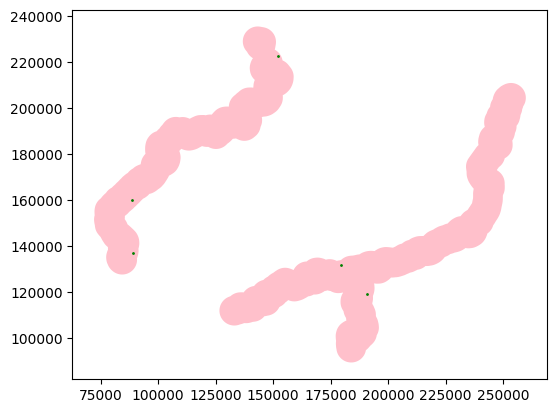

In [ ]:
# simple
base=riversAll_buf.plot(color='pink')
riosenbuffer.plot(ax=base, color='green', markersize=1)

In [ ]:
# folium

base=riversAll_buf.explore(color='pink')
riosenbuffer.explore(m=base, color='green')

### Exercise 5

<div class="alert-success">
    
1. Get a polygons map of the lowest administrative unit possible.
    
2. Get a table of variables for those units. At least 3 numerical variables.

3. Preprocess both tables and get them ready for merging.

4. Do the merging, making the changes needed so that you keep the most columns.
    
    
</div>

In [ ]:
#obtenemos la data
import pandas as pd
import os

peruDataLink="https://github.com/CienciaDeDatosEspacial/GeoDataFrame_Analytics/raw/main/data/dataPeru_indicadores.xlsx"
datadis=pd.read_excel(peruDataLink,
                     dtype={'Ubigeo': object})
datadis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ubigeo                    1874 non-null   object 
 1   Departamento              1874 non-null   object 
 2   Provincia                 1874 non-null   object 
 3   Distrito                  1874 non-null   object 
 4   Poblacion                 1874 non-null   int64  
 5   Superficie                1874 non-null   float64
 6   IDH2019                   1874 non-null   float64
 7   Educ_sec_comp2019_pct     1874 non-null   float64
 8   NBI2017_pct               1874 non-null   float64
 9   Viv_sin_serv_hig2017_pct  1874 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 146.5+ KB


In [ ]:
datadis.head()

,Ubigeo,Departamento,Provincia,Distrito,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct
0,010202,Amazonas,Bagua,ARAMANGO,10940,809.07,0.361182,37.545885,62.9,9.1
1,010201,Amazonas,Bagua,BAGUA,26091,150.99,0.584063,70.795501,25.4,0.7
2,010203,Amazonas,Bagua,COPALLIN,6319,99.05,0.467245,52.571361,45.4,2.1
3,010204,Amazonas,Bagua,EL PARCO,1492,18.48,0.489049,70.215409,59.9,1.5
4,010205,Amazonas,Bagua,IMAZA,24323,4430.84,0.298089,31.295719,88.4,11.7


In [ ]:
# map
import geopandas as gpd

peruMapaDistLink="https://github.com/CienciaDeDatosEspacial/GeoDataFrame_Analytics/raw/main/maps/DistritosMap.zip"

mapdis=gpd.read_file(peruMapaDistLink)

mapdis.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DEPARTAMEN  1874 non-null   object  
 1   PROVINCIA   1874 non-null   object  
 2   DISTRITO    1874 non-null   object  
 3   INSTITUCIO  1874 non-null   object  
 4   geometry    1874 non-null   geometry
dtypes: geometry(1), object(4)
memory usage: 73.3+ KB


In [ ]:
mapdis.head()

,DEPARTAMEN,PROVINCIA,DISTRITO,INSTITUCIO,geometry
0,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,IGN,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1..."
1,TACNA,TACNA,POCOLLAY,IGN,"POLYGON ((-69.93475 -17.92557, -69.90467 -17.9..."
2,TACNA,TACNA,CALANA,IGN,"POLYGON ((-70.11604 -17.91106, -70.11457 -17.9..."
3,TACNA,TACNA,TACNA,IGN,"POLYGON ((-70.3149 -17.94498, -70.30682 -17.95..."
4,TACNA,TACNA,SAMA,IGN,"POLYGON ((-70.42497 -17.88934, -70.48022 -17.9..."


primero, verificamos la cantidad de filas

In [ ]:
mapdis.merge(datadis, left_on='DISTRITO', right_on='Distrito').shape

(2323, 15)

se verifican capitales, espacios,símbolos, etc.

In [ ]:
capitalizeColumns=lambda x: x.str.upper().str.strip()
datadis[['Provincia','Distrito']]=datadis[['Provincia','Distrito']].apply(capitalizeColumns)
mapdis[['PROVINCIA','DISTRITO']]=mapdis[['PROVINCIA','DISTRITO']].apply(capitalizeColumns)

In [ ]:
!pip install unidecode
import unidecode


byePunctuation=lambda x: unidecode.unidecode(x)
datadis[['Provincia','Distrito']]=datadis[['Provincia','Distrito']].map(byePunctuation)  #applymap for olderpandas
mapdis[['PROVINCIA','DISTRITO']]=mapdis[['PROVINCIA','DISTRITO']].map(byePunctuation) #applymap for olderpandas

In [ ]:
datadis.Distrito.duplicated().sum(),mapdis.DISTRITO.duplicated().sum()

(154, 152)

In [ ]:
# concatenating
datadis['provDist']=["+".join(pd) for pd in zip (datadis.Provincia,datadis.Distrito)]
mapdis['provDist']=["+".join(pd) for pd in zip (mapdis.PROVINCIA,mapdis.DISTRITO)]

In [ ]:
# the new column looks like this:
datadis['provDist'].head()

,provDist
0,BAGUA+ARAMANGO
1,BAGUA+BAGUA
2,BAGUA+COPALLIN
3,BAGUA+EL PARCO
4,BAGUA+IMAZA


In [ ]:
nomatch_df=set(datadis.provDist)- set(mapdis.provDist)
nomatch_gdf=set(mapdis.provDist)-set(datadis.provDist)

In [ ]:
len(nomatch_df), len(nomatch_gdf)

(26, 26)

In [ ]:
# pick the closest match from nomatch_gdf for a value in nomatch_df
!pip install thefuzz
from thefuzz import process
[(dis,process.extractOne(dis,nomatch_gdf)) for dis in sorted(nomatch_df)]

[('ANGARAES+HUANCA-HUANCA', ('ANGARAES+HUANCA HUANCA', 100)),
 ('ANGARAES+HUAYLLAY GRANDE', ('ANGARAES+HUALLAY GRANDE', 98)),
 ('AYMARAES+CARAYBAMBA', ('AYMARAES+CARAIBAMBA', 95)),
 ('AYMARAES+HUAYLLO', ('AYMARAES+IHUAYLLO', 97)),
 ('CHINCHEROS+ANCO_HUALLO', ('CHINCHEROS+ANCO HUALLO', 100)),
 ('HUAMANGA+SAN JOSE DE TICLLAS', ('HUAMANGA+SAN JOSE  DE TICLLAS', 98)),
 ('HUARAZ+PAMPAS', ('HUARAZ+PAMPAS GRANDE', 90)),
 ('ICA+SAN JOSE DE LOS MOLINOS', ('ICA+SAN JOSE DE  LOS MOLINOS', 98)),
 ('JAUJA+MASMA CHICCHE', ('JAUJA+MASMA-CHICCHE', 100)),
 ('JAUJA+TUNAN MARCA', ('JAUJA+TUNAN-MARCA', 100)),
 ('LEONCIO PRADO+DANIEL ALOMIAS ROBLES',
  ('LEONCIO PRADO+DANIEL ALOMIA ROBLES', 99)),
 ('LIMA+PUEBLO LIBRE', ('LIMA+MAGDALENA VIEJA', 49)),
 ('PICOTA+TRES UNIDOS', ('PICOTA+TRES-UNIDOS', 100)),
 ('PIURA+26 DE OCTUBRE', ('PIURA+VEINTISEIS DE OCTUBRE', 87)),
 ('SAN MARTIN+PAPAPLAYA', ('SAN MARTIN+PAPA-PLAYA', 98)),
 ('SECHURA+RINCONADA LLICUAR', ('SECHURA+RINCONADA-LLICUAR', 100)),
 ('TACNA+LA YARADA

In [ ]:
changesDis_df={dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}
changesDis_df

{'ANGARAES+HUANCA-HUANCA': 'ANGARAES+HUANCA HUANCA',
 'ANGARAES+HUAYLLAY GRANDE': 'ANGARAES+HUALLAY GRANDE',
 'AYMARAES+CARAYBAMBA': 'AYMARAES+CARAIBAMBA',
 'AYMARAES+HUAYLLO': 'AYMARAES+IHUAYLLO',
 'CHINCHEROS+ANCO_HUALLO': 'CHINCHEROS+ANCO HUALLO',
 'HUAMANGA+SAN JOSE DE TICLLAS': 'HUAMANGA+SAN JOSE  DE TICLLAS',
 'HUARAZ+PAMPAS': 'HUARAZ+PAMPAS GRANDE',
 'ICA+SAN JOSE DE LOS MOLINOS': 'ICA+SAN JOSE DE  LOS MOLINOS',
 'JAUJA+MASMA CHICCHE': 'JAUJA+MASMA-CHICCHE',
 'JAUJA+TUNAN MARCA': 'JAUJA+TUNAN-MARCA',
 'LEONCIO PRADO+DANIEL ALOMIAS ROBLES': 'LEONCIO PRADO+DANIEL ALOMIA ROBLES',
 'LIMA+PUEBLO LIBRE': 'LIMA+MAGDALENA VIEJA',
 'PICOTA+TRES UNIDOS': 'PICOTA+TRES-UNIDOS',
 'PIURA+26 DE OCTUBRE': 'PIURA+VEINTISEIS DE OCTUBRE',
 'SAN MARTIN+PAPAPLAYA': 'SAN MARTIN+PAPA-PLAYA',
 'SECHURA+RINCONADA LLICUAR': 'SECHURA+RINCONADA-LLICUAR',
 'TACNA+LA YARADA-LOS PALOS': 'TACNA+LA YARADA LOS PALOS',
 'TARATA+ESTIQUE-PAMPA': 'TARATA+ESTIQUE PAMPA',
 'VILCAS HUAMAN+ACCOMARCA': 'VILCAS-HUAMAN+ACC

In [ ]:
datadis.replace({'provDist':changesDis_df},inplace=True)

In [ ]:
datadisMap=mapdis.merge(datadis, on='provDist')
# check
datadisMap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   DEPARTAMEN                1874 non-null   object  
 1   PROVINCIA                 1874 non-null   object  
 2   DISTRITO                  1874 non-null   object  
 3   INSTITUCIO                1874 non-null   object  
 4   geometry                  1874 non-null   geometry
 5   provDist                  1874 non-null   object  
 6   Ubigeo                    1874 non-null   object  
 7   Departamento              1874 non-null   object  
 8   Provincia                 1874 non-null   object  
 9   Distrito                  1874 non-null   object  
 10  Poblacion                 1874 non-null   int64   
 11  Superficie                1874 non-null   float64 
 12  IDH2019                   1874 non-null   float64 
 13  Educ_sec_comp2019_pct     1874 non-null 

In [ ]:
bye=['Departamento', 'Provincia', 'Distrito','INSTITUCIO','provDist']
datadisMap.drop(columns=bye,inplace=True)

# keeping
datadisMap.head()

,DEPARTAMEN,PROVINCIA,DISTRITO,geometry,Ubigeo,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct
0,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1...",230110,123662,187.74,0.578968,71.178389,15.8,0.8
1,TACNA,TACNA,POCOLLAY,"POLYGON ((-69.93475 -17.92557, -69.90467 -17.9...",230108,22319,265.65,0.645954,75.825743,16.1,0.9
2,TACNA,TACNA,CALANA,"POLYGON ((-70.11604 -17.91106, -70.11457 -17.9...",230103,3338,108.38,0.564102,77.829717,15.9,3.3
3,TACNA,TACNA,TACNA,"POLYGON ((-70.3149 -17.94498, -70.30682 -17.95...",230101,80845,1877.78,0.696613,75.491958,7.4,0.6
4,TACNA,TACNA,SAMA,"POLYGON ((-70.42497 -17.88934, -70.48022 -17.9...",230109,2679,1115.98,0.552622,70.500250,52.4,10.8


### Exercise 6

<div class="alert-success">
        
Compute the neighbors of the capital of your country. Plot the results for each of the options.
    
</div>

In [ ]:
# statistics
datadisMap.IDH2019.describe()

,IDH2019
count,1874.000000
mean,0.409405
std,0.140059
min,0.091195
25%,0.304729
50%,0.386020
75%,0.507002
max,0.845217


<Axes: xlabel='IDH2019', ylabel='Count'>

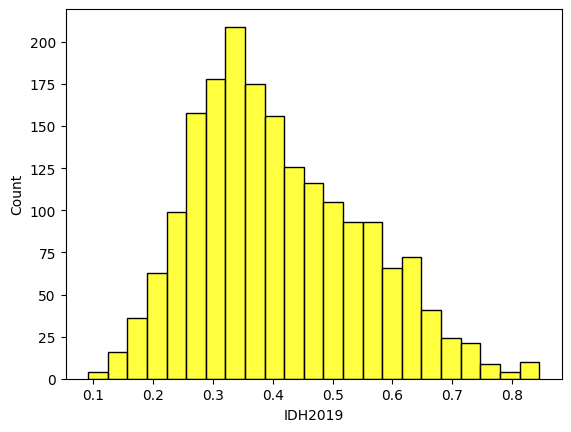

In [ ]:
import seaborn as sea

sea.histplot(datadisMap.IDH2019, color='yellow')

In [ ]:
datadisMap.explore(
    column="IDH2019",
    scheme="fisherjenks",
    legend=True,
    tooltip=False,
    popup=['DEPARTAMEN', 'PROVINCIA', 'DISTRITO'],  # show popup (on-click)
    legend_kwds=dict(colorbar=False)
)

In [ ]:
!pip install pysal

In [ ]:
from libpysal.weights import Queen, Rook, KNN

# rook
w_rook = Rook.from_dataframe(datadisMap,use_index=False)

In [ ]:
w_rook.islands

In [ ]:
# queen
w_queen = Queen.from_dataframe(datadisMap,use_index=False)

In [ ]:
w_queen.islands

In [ ]:
datadisMap.iloc[w_queen.islands,:].explore()

In [ ]:
# k=8 nearest neighbors
w_knn8 = KNN.from_dataframe(datadisMap, k=8)

In [ ]:
w_knn8.islands

In [ ]:
# primeros 7 distritos del GDF
datadisMap.head(7)

,DEPARTAMEN,PROVINCIA,DISTRITO,geometry,Ubigeo,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct
0,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1...",230110,123662,187.74,0.578968,71.178389,15.8,0.8
1,TACNA,TACNA,POCOLLAY,"POLYGON ((-69.93475 -17.92557, -69.90467 -17.9...",230108,22319,265.65,0.645954,75.825743,16.1,0.9
2,TACNA,TACNA,CALANA,"POLYGON ((-70.11604 -17.91106, -70.11457 -17.9...",230103,3338,108.38,0.564102,77.829717,15.9,3.3
3,TACNA,TACNA,TACNA,"POLYGON ((-70.3149 -17.94498, -70.30682 -17.95...",230101,80845,1877.78,0.696613,75.491958,7.4,0.6
4,TACNA,TACNA,SAMA,"POLYGON ((-70.42497 -17.88934, -70.48022 -17.9...",230109,2679,1115.98,0.552622,70.500250,52.4,10.8
5,TACNA,TACNA,CIUDAD NUEVA,"POLYGON ((-70.07117 -17.7112, -70.0711 -17.711...",230104,39060,173.42,0.524735,75.551790,13.9,0.6
6,TACNA,JORGE BASADRE,ITE,"POLYGON ((-70.8634 -17.68767, -70.86283 -17.68...",230303,3415,848.18,0.686004,70.001391,46.5,5.5


In [ ]:
#podemos verlo por separado
datadisMap.iloc[[6]]

,DEPARTAMEN,PROVINCIA,DISTRITO,geometry,Ubigeo,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct
6,TACNA,JORGE BASADRE,ITE,"POLYGON ((-70.8634 -17.68767, -70.86283 -17.68...",230303,3415,848.18,0.686004,70.001391,46.5,5.5


In [ ]:
# amount of neighbors of that district
len(w_rook.neighbors[6])

4

In [ ]:
# details
datadisMap.iloc[w_rook.neighbors[6],]

,DEPARTAMEN,PROVINCIA,DISTRITO,geometry,Ubigeo,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct
4,TACNA,TACNA,SAMA,"POLYGON ((-70.42497 -17.88934, -70.48022 -17.9...",230109,2679,1115.98,0.552622,70.500250,52.4,10.8
15,MOQUEGUA,ILO,EL ALGARROBAL,"POLYGON ((-71.25881 -17.44067, -71.25696 -17.4...",180302,332,747.00,0.651775,64.231960,63.8,1.8
14,TACNA,JORGE BASADRE,LOCUMBA,"POLYGON ((-70.69764 -17.4442, -70.6968 -17.444...",230301,2641,968.99,0.580893,71.934081,56.6,12.1
7,MOQUEGUA,ILO,ILO,"POLYGON ((-71.33934 -17.62215, -71.33907 -17.6...",180301,69079,295.51,0.683157,73.069677,17.9,0.6


<Axes: >

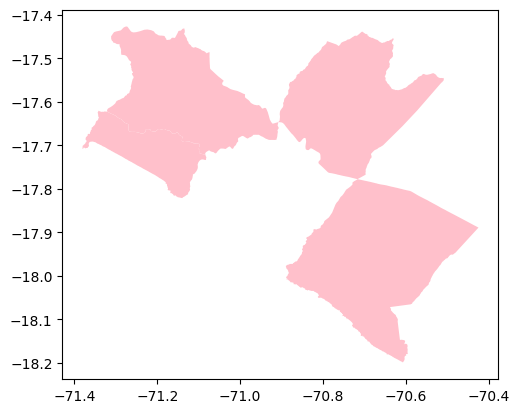

In [ ]:
# see the neighbor
datadisMap.iloc[w_rook.neighbors[6] ,].plot(facecolor="pink")

<Axes: >

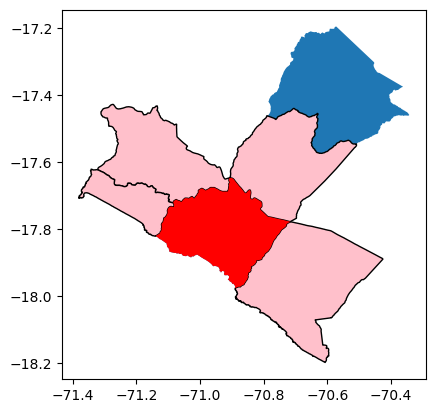

In [ ]:
# see whole area
base=datadisMap[datadisMap.PROVINCIA=="JORGE BASADRE"].plot()
datadisMap.iloc[w_rook.neighbors[6] ,].plot(ax=base,facecolor="pink",edgecolor='k')
datadisMap.iloc[[6]].plot(ax=base,facecolor="red")

con queen neighbors

In [ ]:
# how many
len(w_queen.neighbors[6])

6

In [ ]:
# details
datadisMap.iloc[w_queen.neighbors[6] ,]

,DEPARTAMEN,PROVINCIA,DISTRITO,geometry,Ubigeo,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct
4,TACNA,TACNA,SAMA,"POLYGON ((-70.42497 -17.88934, -70.48022 -17.9...",230109,2679,1115.98,0.552622,70.500250,52.4,10.8
36,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,"POLYGON ((-71.02887 -16.75541, -71.02774 -16.7...",180101,59387,3949.04,0.701939,74.139092,24.0,1.4
7,MOQUEGUA,ILO,ILO,"POLYGON ((-71.33934 -17.62215, -71.33907 -17.6...",180301,69079,295.51,0.683157,73.069677,17.9,0.6
13,TACNA,TACNA,INCLAN,"POLYGON ((-70.37563 -17.45981, -70.37504 -17.4...",230105,8125,1414.82,0.535104,73.795538,53.9,6.6
14,TACNA,JORGE BASADRE,LOCUMBA,"POLYGON ((-70.69764 -17.4442, -70.6968 -17.444...",230301,2641,968.99,0.580893,71.934081,56.6,12.1
15,MOQUEGUA,ILO,EL ALGARROBAL,"POLYGON ((-71.25881 -17.44067, -71.25696 -17.4...",180302,332,747.00,0.651775,64.231960,63.8,1.8


<Axes: >

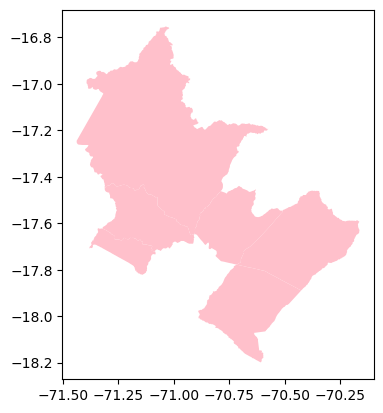

In [ ]:
# see
datadisMap.iloc[w_queen.neighbors[6] ,].plot(facecolor="pink")

<Axes: >

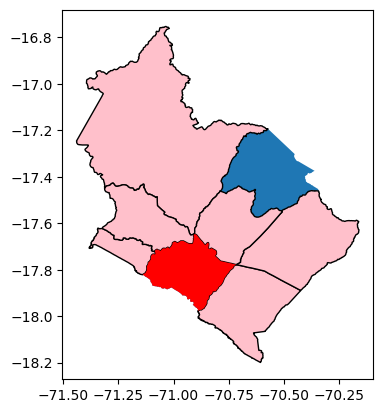

In [ ]:
# whole area
base=datadisMap[datadisMap.PROVINCIA=="JORGE BASADRE"].plot()
datadisMap.iloc[w_queen.neighbors[6] ,].plot(ax=base,facecolor="pink",edgecolor='k')
datadisMap.iloc[[6]].plot(ax=base,facecolor="red")

kn8 cercanos

In [ ]:
w_knn8.neighbors[6] #inicia en 0 -> distrito 7

[14, 7, 15, 4, 13, 25, 21, 36]

<Axes: >

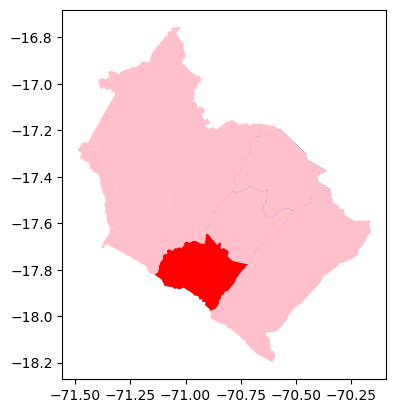

In [ ]:
base=datadisMap[datadisMap.PROVINCIA=="JORGE BASADRE"].plot()
datadisMap.iloc[w_knn8.neighbors[6],].plot(ax=base,facecolor="pink")
datadisMap.iloc[[6]].plot(ax=base,facecolor="red")

<Axes: >

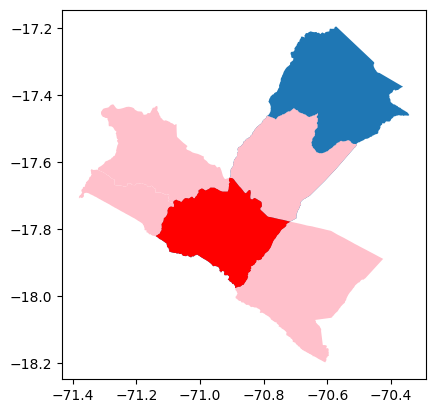

In [ ]:
# what about k=4

w_knn4 = KNN.from_dataframe(datadisMap, k=4)

base=datadisMap[datadisMap.PROVINCIA=="JORGE BASADRE"].plot()
datadisMap.iloc[w_knn4.neighbors[6],].plot(ax=base,facecolor="pink")
datadisMap.iloc[[6]].plot(ax=base,facecolor="red")